In [4]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [5]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [6]:
import ast

import numpy as np
import pandas as pd

from scipy.stats import spearmanr

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter


In [10]:
N_SAMPLE_LIST = [24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
TOTAL_N_LIST = [n + 96 for n in N_SAMPLE_LIST]

In [11]:
landscape_attribute_df = pd.read_csv("results/merged/merge_landscapeattributes_all.csv")
landscape_attribute_df

,lib,n_site,numb_measured,percent_measured,numb_active,percent_active,active_fit_min,parent_fit,parent_rank,mean,...,top96_SSM_mean_top96,top96_SSM_median_top96,top96_SSM_mean_top384,top96_SSM_median_top384,top96_SSM_fraction_max,top96_SSM_numb_path,numb_loc_opt_norm_cannot_escape,frac_loc_opt_norm_cannot_escape,norm_non-magnitude,norm_reciprocal-sign
0,DHFR,3.0,8000.0,100.000000,854.0,10.675000,0.158614,0.231325,602.0,0.157945,...,1.000000,1.000000,1.000000,1.000000,0.632319,854,1.0,0.000125,4.465397,0.205829
1,ParD2,3.0,7882.0,98.525000,6533.0,82.885055,0.000087,0.973896,12.0,0.228092,...,1.000000,1.000000,1.000000,1.000000,0.722639,6533,1.0,0.000127,28.445324,5.735556
2,ParD3,3.0,7882.0,98.525000,7248.0,91.956356,0.000485,0.982799,7.0,0.321921,...,1.000000,1.000000,1.000000,1.000000,0.178532,7248,1.0,0.000127,28.665219,5.172631
3,GB1,4.0,149361.0,93.350625,34545.0,23.128528,0.001141,0.114130,3644.0,0.009189,...,1.000000,1.000000,1.000000,1.000000,0.025040,34545,2.0,0.000013,9.278868,1.678579
4,T7,3.0,6725.0,84.062500,234.0,3.479554,0.176534,0.288006,163.0,0.016500,...,0.817149,0.772854,0.817149,0.772854,0.017094,234,4.0,0.000595,1.809783,0.547083
5,TEV,4.0,159132.0,99.457500,18262.0,11.476007,0.035601,0.295036,665.0,-0.012509,...,0.943851,1.000000,0.829413,0.810121,0.003395,18262,23.0,0.000145,6.438395,2.381029
6,TrpB3A,3.0,7971.0,99.637500,59.0,0.740183,0.097444,1.000000,1.0,-0.039231,...,0.428916,0.230815,0.428916,0.230815,0.288136,59,3.0,0.000376,0.446493,0.164719
7,TrpB3B,3.0,7996.0,99.950000,18.0,0.225113,0.086085,1.000000,1.0,-0.055223,...,0.274086,0.127970,0.274086,0.127970,0.166667,18,3.0,0.000375,0.122204,0.057886
8,TrpB3C,3.0,7994.0,99.925000,35.0,0.437828,0.207105,1.000000,1.0,-0.073327,...,0.379468,0.315253,0.379468,0.315253,0.114286,35,4.0,0.000500,0.259397,0.101303
9,TrpB3D,3.0,7763.0,97.037500,719.0,9.261883,0.078985,0.820029,10.0,0.018834,...,1.000000,1.000000,0.996377,1.000000,0.393602,719,3.0,0.000386,4.588191,1.260749


In [12]:
active_cutoff = 1
active_lib_list = landscape_attribute_df[(landscape_attribute_df["percent_active"]>active_cutoff)]["lib"].tolist() # & (lib_stat["percent_measured"]>90)
active_lib_list

['DHFR',
 'ParD2',
 'ParD3',
 'GB1',
 'T7',
 'TEV',
 'TrpB3D',
 'TrpB3E',
 'TrpB3F',
 'TrpB3G',
 'TrpB3I',
 'TrpB4']

In [21]:
merge_df = pd.read_csv("/disk2/fli/SSMuLA/results/merged/MLDE_all_384_boosting|ridge-top96_ft-0.125.csv")
merge_df = merge_df[merge_df["lib"].isin(active_lib_list)].reset_index(drop=True).sort_values("lib")
merge_df

,lib,n_site,numb_measured,percent_measured,numb_active,percent_active,active_fit_min,parent_fit,parent_rank,mean,...,if_truemaxs_two-best,deltafrac_double_mlde,deltafrac_ft_mlde,deltafrac_ft_recomb_SSM,deltafrac_ft_single_step_DE,deltafrac_ft_top96_SSM,deltafrac_ft-comb_mlde,deltafrac_ft-comb_recomb_SSM,deltafrac_ft-comb_single_step_DE,deltafrac_ft-comb_top96_SSM
0,DHFR,3.0,8000.0,100.000000,854.0,10.675000,0.158614,0.231325,602.0,0.157945,...,NaN,0.275,0.490,0.909836,0.716432,0.367681,0.490,0.909836,0.716432,0.367681
3,GB1,4.0,149361.0,93.350625,34545.0,23.128528,0.001141,0.114130,3644.0,0.009189,...,NaN,0.000,0.300,0.357945,0.333955,0.334960,0.320,0.377945,0.353955,0.354960
1,ParD2,3.0,7882.0,98.525000,6533.0,82.885055,0.000087,0.973896,12.0,0.228092,...,NaN,-0.020,0.010,0.714832,0.439461,0.277361,0.010,0.714832,0.439461,0.277361
2,ParD3,3.0,7882.0,98.525000,7248.0,91.956356,0.000485,0.982799,7.0,0.321921,...,NaN,-0.170,0.810,0.972136,0.697117,0.801468,0.810,0.972136,0.697117,0.801468
4,T7,3.0,6725.0,84.062500,234.0,3.479554,0.176534,0.288006,163.0,0.016500,...,NaN,-0.050,0.170,0.211453,0.209316,0.202906,0.170,0.211453,0.209316,0.202906
5,TEV,4.0,159132.0,99.457500,18262.0,11.476007,0.035601,0.295036,665.0,-0.012509,...,NaN,0.000,0.000,-0.001040,-0.001964,-0.003395,0.000,-0.001040,-0.001964,-0.003395
6,TrpB3D,3.0,7763.0,97.037500,719.0,9.261883,0.078985,0.820029,10.0,0.018834,...,NaN,0.305,0.445,0.867976,0.755088,0.531398,0.445,0.867976,0.755088,0.531398
7,TrpB3E,3.0,7964.0,99.550000,161.0,2.021597,0.041910,0.610622,5.0,0.002082,...,NaN,0.550,0.550,0.832298,0.795031,0.770186,0.550,0.832298,0.795031,0.770186
8,TrpB3F,3.0,7737.0,96.712500,82.0,1.059842,0.092374,1.000000,1.0,-0.023140,...,NaN,0.085,0.090,0.585366,0.453252,0.256098,0.090,0.585366,0.453252,0.256098
9,TrpB3G,3.0,7891.0,98.637500,108.0,1.368648,0.072712,0.519956,13.0,-0.002391,...,NaN,0.185,0.270,0.786296,0.647407,0.490000,0.270,0.786296,0.647407,0.490000


In [22]:
pooled_ft = merge_df[
    [
        "top_maxes_Triad",
        "top_maxes_esm",
        "top_maxes_esmif",
        "top_maxes_ev",
        "top_maxes_coves",
        "top_maxes_double",
    ]
].mean(axis=1, skipna=True)
# ].mean(axis=1)

In [23]:
# load alde
alde_all = pd.read_csv("/disk2/fli/SSMuLA/results/alde/alde_all.csv")

In [24]:
sliced_alde = alde_all[
    (alde_all["rounds"] == 4)
    & (alde_all["Encoding"] == "onehot")
    & (alde_all["Model"] == "Boosting Ensemble")
    & (alde_all["Acquisition"] == "GREEDY")
    & (alde_all["n_samples"] == 384)
    & (alde_all["Protein"].isin(active_lib_list))
]
sliced_alde

,n_mut_cutoff,zs,rounds,n_samples,Protein,Encoding,Model,Acquisition,Timestep,Mean,Std,Frac
13322,all,esmif,4,384,DHFR,onehot,Boosting Ensemble,GREEDY,384,0.997053,0.001843,0.94
13335,all,esmif,4,384,GB1,onehot,Boosting Ensemble,GREEDY,384,0.830043,0.019505,0.28
13348,all,esmif,4,384,ParD2,onehot,Boosting Ensemble,GREEDY,384,1.000000,0.000000,1.00
13361,all,esmif,4,384,ParD3,onehot,Boosting Ensemble,GREEDY,384,0.999546,0.000318,0.96
13374,all,esmif,4,384,T7,onehot,Boosting Ensemble,GREEDY,384,0.775926,0.007815,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...
25932,all,NaN,4,384,TrpB3E,onehot,Boosting Ensemble,GREEDY,384,0.478813,0.063434,0.42
25945,all,NaN,4,384,TrpB3F,onehot,Boosting Ensemble,GREEDY,384,0.949399,0.028288,0.92
25958,all,NaN,4,384,TrpB3G,onehot,Boosting Ensemble,GREEDY,384,0.946825,0.023206,0.88
25984,all,NaN,4,384,TrpB3I,onehot,Boosting Ensemble,GREEDY,384,0.994197,0.005434,0.94


In [25]:
sliced_alde["zs"].unique()

array(['esmif', 'ev', 'coves', 'ed', 'esm', 'Triad', nan], dtype=object)

In [26]:
ftalde = (
    sliced_alde[~sliced_alde["zs"].isna()][["Protein", "Mean", "Frac"]]
    .groupby("Protein")
    .mean()
    .reset_index()
    .rename(columns={"Protein": "lib", "Mean": "ftalde_top_max", "Frac": "ftalde_top_frac"})
)
ftalde

,lib,ftalde_top_max,ftalde_top_frac
0,DHFR,0.954825,0.686667
1,GB1,0.791316,0.246667
2,ParD2,0.999932,0.993333
3,ParD3,0.997198,0.783333
4,T7,0.777364,0.020000
5,TEV,0.392449,0.000000
6,TrpB3D,0.979860,0.816667
7,TrpB3E,0.886031,0.840000
8,TrpB3F,1.000000,1.000000
9,TrpB3G,0.989849,0.956667


In [27]:
alde = (
    sliced_alde[sliced_alde["zs"].isna()][["Protein", "Mean", "Frac"]]
    .groupby("Protein")
    .mean()
    .reset_index()
    .rename(columns={"Protein": "lib", "Mean": "alde_top_max", "Frac": "alde_frac"})
)
alde

,lib,alde_top_max,alde_frac
0,DHFR,0.934166,0.48
1,GB1,0.768671,0.08
2,ParD2,0.999476,0.94
3,ParD3,0.996783,0.74
4,T7,0.810759,0.00
5,TEV,0.433022,0.04
6,TrpB3D,0.963345,0.62
7,TrpB3E,0.478813,0.42
8,TrpB3F,0.949399,0.92
9,TrpB3G,0.946825,0.88


In [28]:
merge_df = pd.merge(merge_df, pd.merge(alde, ftalde, on="lib"), on="lib")
merge_df

,lib,n_site,numb_measured,percent_measured,numb_active,percent_active,active_fit_min,parent_fit,parent_rank,mean,...,deltafrac_ft_single_step_DE,deltafrac_ft_top96_SSM,deltafrac_ft-comb_mlde,deltafrac_ft-comb_recomb_SSM,deltafrac_ft-comb_single_step_DE,deltafrac_ft-comb_top96_SSM,alde_top_max,alde_frac,ftalde_top_max,ftalde_top_frac
0,DHFR,3.0,8000.0,100.000000,854.0,10.675000,0.158614,0.231325,602.0,0.157945,...,0.716432,0.367681,0.490,0.909836,0.716432,0.367681,0.934166,0.48,0.954825,0.686667
1,GB1,4.0,149361.0,93.350625,34545.0,23.128528,0.001141,0.114130,3644.0,0.009189,...,0.333955,0.334960,0.320,0.377945,0.353955,0.354960,0.768671,0.08,0.791316,0.246667
2,ParD2,3.0,7882.0,98.525000,6533.0,82.885055,0.000087,0.973896,12.0,0.228092,...,0.439461,0.277361,0.010,0.714832,0.439461,0.277361,0.999476,0.94,0.999932,0.993333
3,ParD3,3.0,7882.0,98.525000,7248.0,91.956356,0.000485,0.982799,7.0,0.321921,...,0.697117,0.801468,0.810,0.972136,0.697117,0.801468,0.996783,0.74,0.997198,0.783333
4,T7,3.0,6725.0,84.062500,234.0,3.479554,0.176534,0.288006,163.0,0.016500,...,0.209316,0.202906,0.170,0.211453,0.209316,0.202906,0.810759,0.00,0.777364,0.020000
5,TEV,4.0,159132.0,99.457500,18262.0,11.476007,0.035601,0.295036,665.0,-0.012509,...,-0.001964,-0.003395,0.000,-0.001040,-0.001964,-0.003395,0.433022,0.04,0.392449,0.000000
6,TrpB3D,3.0,7763.0,97.037500,719.0,9.261883,0.078985,0.820029,10.0,0.018834,...,0.755088,0.531398,0.445,0.867976,0.755088,0.531398,0.963345,0.62,0.979860,0.816667
7,TrpB3E,3.0,7964.0,99.550000,161.0,2.021597,0.041910,0.610622,5.0,0.002082,...,0.795031,0.770186,0.550,0.832298,0.795031,0.770186,0.478813,0.42,0.886031,0.840000
8,TrpB3F,3.0,7737.0,96.712500,82.0,1.059842,0.092374,1.000000,1.0,-0.023140,...,0.453252,0.256098,0.090,0.585366,0.453252,0.256098,0.949399,0.92,1.000000,1.000000
9,TrpB3G,3.0,7891.0,98.637500,108.0,1.368648,0.072712,0.519956,13.0,-0.002391,...,0.647407,0.490000,0.270,0.786296,0.647407,0.490000,0.946825,0.88,0.989849,0.956667


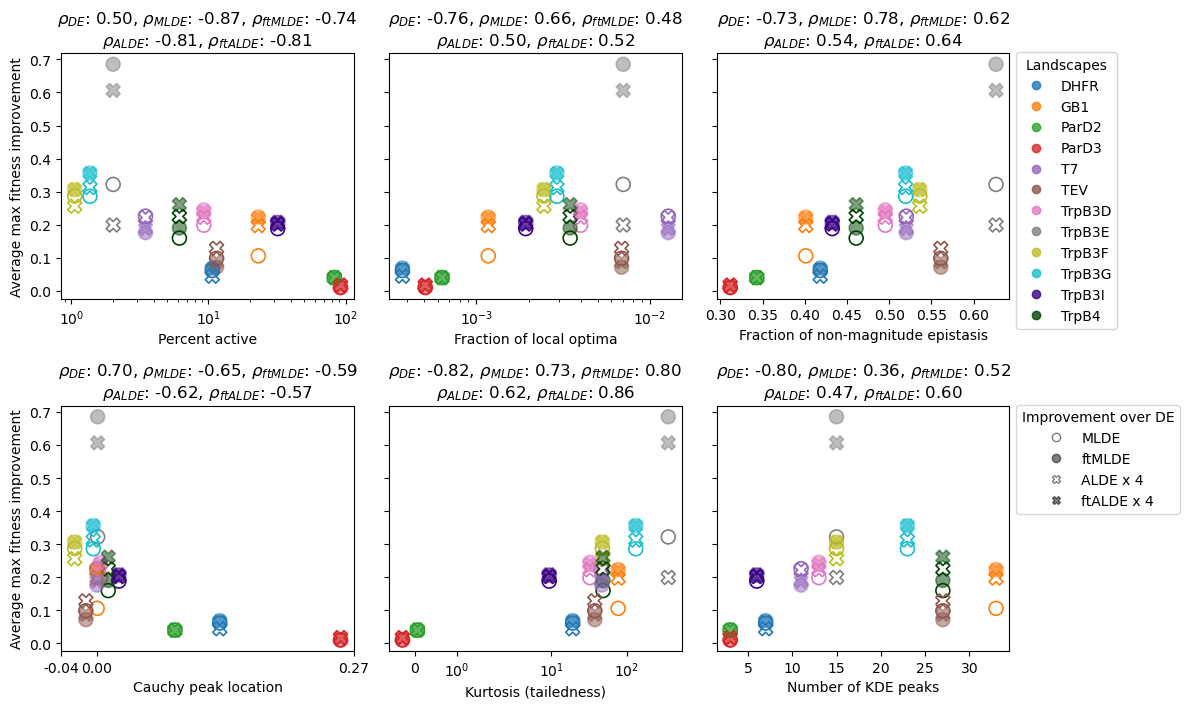

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter
from scipy.stats import spearmanr

import colorcet as cc
import matplotlib.colors as mcolors

# Select a colorcet colormap, for example, 'fire' or 'CET_CBL1'
colormap = cc.cm['glasbey_category10']

# Extract a list of hex codes from the colormap
glasbey_category10 = [mcolors.to_hex(colormap(i)) for i in range(colormap.N)]

# Define a reusable function for scatter plots and titles
def create_scatter(
    ax, x_data, y_data, xlabel, title_fmt, x_scale="linear", y_label=None
):
    for y, label in zip(
        [mlde, ftmlde, alde_y, ftalde_y], ["MLDE", "ftMLDE", "ALDE", "ftALDE"]
    ):
        ax.scatter(
            x_data, y, edgecolors=clist, s=100, linewidth=1.2, **style_dict[label]
        )
    ax.set_xscale(x_scale)
    ax.set_xlabel(xlabel)
    if y_label:
        ax.set_ylabel(y_label)
    # Title with two lines including both MLDE/ftMLDE and ALDE/ftALDE correlations
    ax.set_title(
        (
            title_fmt.format(
                spearmanr(merge_df["single_step_DE_mean_all"], x_data)[0],
                spearmanr(mlde, x_data)[0],
                spearmanr(ftmlde, x_data)[0],
            )
            + "\n"
            + r"$\rho_{{ALDE}}$: {:.2f}, $\rho_{{ftALDE}}$: {:.2f}".format(
                spearmanr(alde_y, x_data)[0], spearmanr(ftalde_y, x_data)[0]
            )
        )
    )


# Prepare data
mlde = merge_df["top_maxes"] - merge_df["single_step_DE_mean_all"]
ftmlde = pooled_ft.to_list() - merge_df["single_step_DE_mean_all"]
alde_y = merge_df["alde_top_max"] - merge_df["single_step_DE_mean_all"]
ftalde_y = merge_df["ftalde_top_max"] - merge_df["single_step_DE_mean_all"]

clist = glasbey_category10[:12] # sns.color_palette("tab10").as_hex() + ["#e5c494", "#a6cee3"]

# Updated style dictionary
style_dict = {
    "MLDE": {"facecolors": "none", "marker": "o"},
    "ftMLDE": {"facecolors": clist, "marker": "o", "alpha": 0.5},
    "ALDE": {"facecolors": "none", "marker": "X"},
    "ftALDE": {"facecolors": clist, "marker": "X", "alpha": 0.5},
}

# Create figure and axes
fig, ax = plt.subplots(2, 3, figsize=(12, 7.2), sharey=True)

# Scatter plots
create_scatter(
    ax[0, 0],
    merge_df["percent_active"],
    [mlde, ftmlde, alde_y, ftalde_y],
    "Percent active",
    r"$\rho_{{DE}}$: {:.2f}, $\rho_{{MLDE}}$: {:.2f}, $\rho_{{ftMLDE}}$: {:.2f}",
    x_scale="log",
    y_label="Average max fitness improvement",
)

create_scatter(
    ax[0, 1],
    merge_df["frac_loc_opt_total"],
    [mlde, ftmlde, alde_y, ftalde_y],
    "Fraction of local optima",
    r"$\rho_{{DE}}$: {:.2f}, $\rho_{{MLDE}}$: {:.2f}, $\rho_{{ftMLDE}}$: {:.2f}",
    x_scale="log",
)

create_scatter(
    ax[0, 2],
    merge_df["fraction_non-magnitude"],
    [mlde, ftmlde, alde_y, ftalde_y],
    "Fraction of non-magnitude epistasis",
    r"$\rho_{{DE}}$: {:.2f}, $\rho_{{MLDE}}$: {:.2f}, $\rho_{{ftMLDE}}$: {:.2f}",
)

create_scatter(
    ax[1, 0],
    merge_df["loc"],
    [mlde, ftmlde, alde_y, ftalde_y],
    "Cauchy peak location",
    r"$\rho_{{DE}}$: {:.2f}, $\rho_{{MLDE}}$: {:.2f}, $\rho_{{ftMLDE}}$: {:.2f}",
    x_scale="symlog",
    y_label="Average max fitness improvement",
)
ax[1, 0].xaxis.set_major_formatter(FormatStrFormatter("%.2f"))

create_scatter(
    ax[1, 1],
    merge_df["kurt"],
    [mlde, ftmlde, alde_y, ftalde_y],
    "Kurtosis (tailedness)",
    r"$\rho_{{DE}}$: {:.2f}, $\rho_{{MLDE}}$: {:.2f}, $\rho_{{ftMLDE}}$: {:.2f}",
    x_scale="symlog",
)

create_scatter(
    ax[1, 2],
    merge_df["numb_kde_peak"],
    [mlde, ftmlde, alde_y, ftalde_y],
    "Number of KDE peaks",
    r"$\rho_{{DE}}$: {:.2f}, $\rho_{{MLDE}}$: {:.2f}, $\rho_{{ftMLDE}}$: {:.2f}",
)

# Legends
legend_list = [
    Line2D([0], [0], marker="o", linestyle="none", color=lc, label=l, alpha=0.8)
    for l, lc in zip(merge_df["lib"], clist)
]
ax[0, 2].legend(
    handles=legend_list,
    loc="upper left",
    title="Landscapes",
    bbox_to_anchor=(1, 1.0325),
)

# Updated legend_list2 using new style_dict
legend_list2 = [
    Line2D(
        [0],
        [0],
        linestyle="none",
        marker=style_dict[label]["marker"],
        markerfacecolor=(
            "black" if style_dict[label]["facecolors"] != "none" else "none"
        ),
        markeredgecolor="black",
        alpha=0.5,
        label=label.replace("ALDE", "ALDE x 4")
    )
    for label in ["MLDE", "ftMLDE", "ALDE", "ftALDE"]
]
ax[1, 2].legend(
    handles=legend_list2,
    loc="upper left",
    title="Improvement over DE",
    bbox_to_anchor=(1, 1.0315),
)

plt.tight_layout()
plt.show()